In [68]:
# Import the packages that we will be using
#Gabriel Azael Fierro Acosta
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots


In [69]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [70]:
#Get a general 'feel' of the data

dataset.info()
dataset.describe()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Flower        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
#Drop rows with any missing values

dataset.dropna(inplace=True)


In [72]:
 #Encoding the class label categorical column: from string to num
# # Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}

# Create a dictionary to map the class labels to numerical values
class_mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}

# Use the map function to replace the string labels with numerical values
dataset["Flower"] = dataset["Flower"].map(class_mapping)

# Display the updated dataset
dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


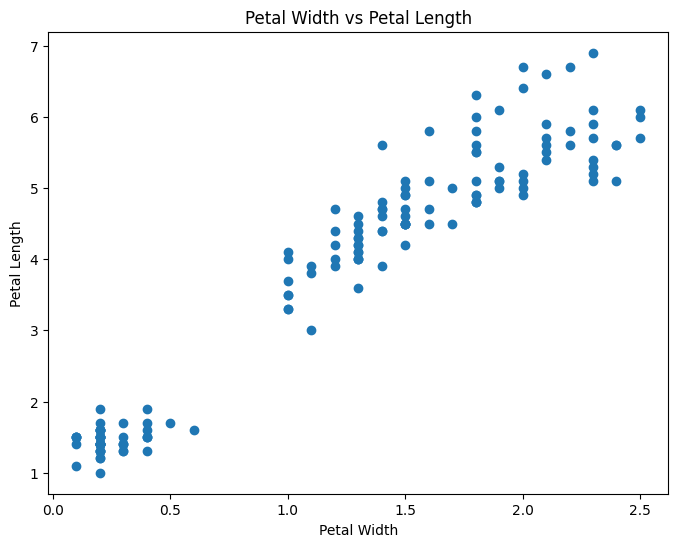

In [73]:
 #Scatter plot of the data petal width vs petal lenght
# Scatter plot of Petal Width vs Petal Length
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Petal_Width'], dataset['Petal_Length'])
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Petal Width vs Petal Length')
plt.show()


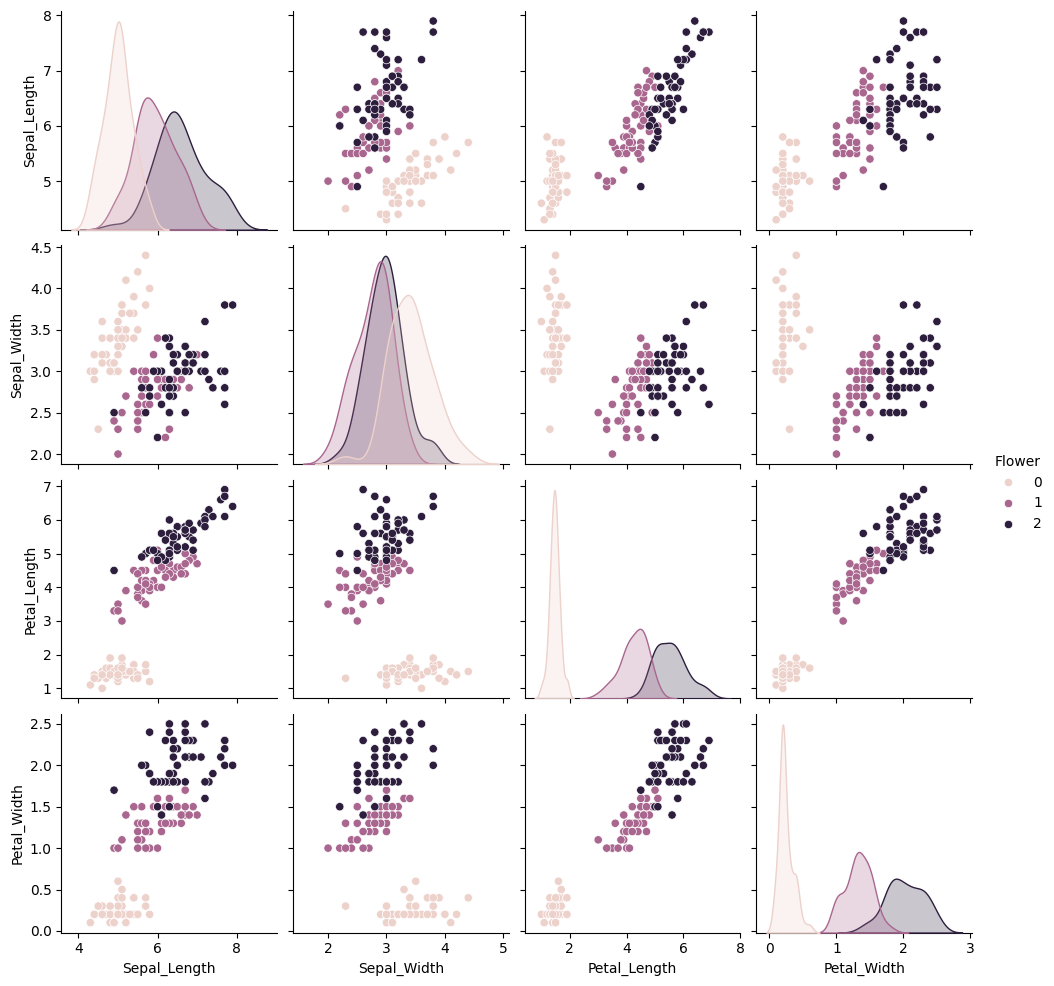

In [74]:
# prompt: # Pairplot: Scatterplot of all variables

import matplotlib.pyplot as plt
# Pairplot: Scatterplot of all variables
sns.pairplot(dataset, hue='Flower')
plt.show()


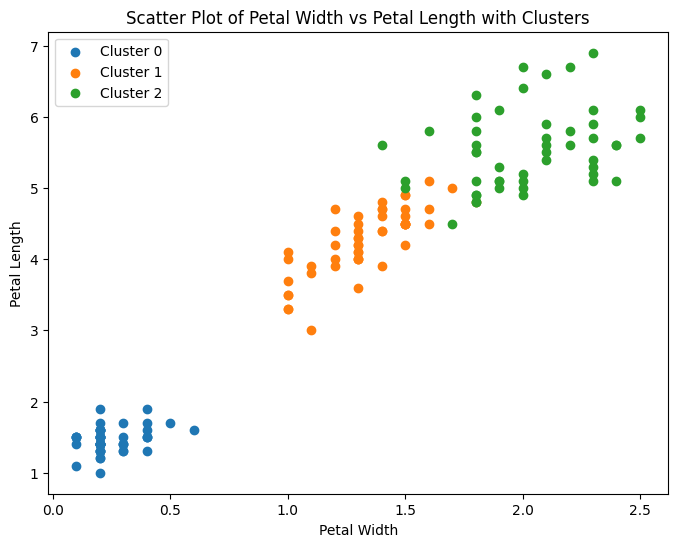

In [75]:
# Assuming you have a 'cluster_labels' column in your dataset indicating the cluster assignment for each data point.
# If not, you'll need to assign cluster labels based on your clustering algorithm results.

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster_id in dataset['Flower'].unique():  # Assuming 'cluster_labels' is your cluster assignment column
  cluster_data = dataset[dataset['Flower'] == cluster_id]
  plt.scatter(cluster_data['Petal_Width'], cluster_data['Petal_Length'], label=f'Cluster {cluster_id}')

plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Petal Width vs Petal Length with Clusters')
plt.legend()
plt.show()


Estimated cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


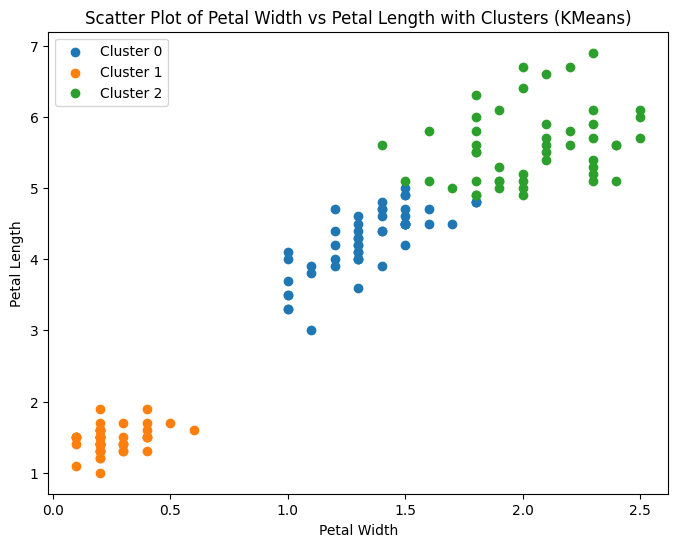

In [76]:

from sklearn.cluster import KMeans

# Define number of clusters
num_clusters = 3  # You can adjust this based on your data

# Select features for clustering
X = dataset[['Petal_Width', 'Petal_Length']]  # You can choose other features if needed

# Do K-means clustering (assign each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=num_clusters, random_state=0)  # Initialize the KMeans model
kmeans.fit(X)  # Fit the model to your data (X)

# Print estimated cluster of each point in the dataset
cluster_labels = kmeans.labels_
print("Estimated cluster labels:", cluster_labels)


# Add the cluster labels to the dataset
dataset['Cluster'] = cluster_labels


# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
  cluster_data = dataset[dataset['Cluster'] == cluster_id]
  plt.scatter(cluster_data['Petal_Width'], cluster_data['Petal_Length'], label=f'Cluster {cluster_id}')

plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Petal Width vs Petal Length with Clusters (KMeans)')
plt.legend()
plt.show()


In [77]:


# Assuming 'cluster_labels' from KMeans and 'Flower' (true labels) are in your dataset
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(dataset['Flower'], dataset['Cluster'])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Manual pairing of labels
# Based on the confusion matrix, you can manually determine the best mapping between estimated clusters and true labels.
# For example, if you see that cluster 0 mostly contains data from true label 1, you can map estimated cluster 0 to true label 1.

# Example mapping (adjust based on your confusion matrix)
label_mapping = {
    0: 1,  # Estimated cluster 0 corresponds to true label 1
    1: 2,  # Estimated cluster 1 corresponds to true label 2
    2: 0   # Estimated cluster 2 corresponds to true label 0
}

# Apply the mapping to the estimated cluster labels
dataset['Mapped_Cluster'] = dataset['Cluster'].map(label_mapping)

# Calculate the confusion matrix again with the mapped labels
cm_mapped = confusion_matrix(dataset['Flower'], dataset['Mapped_Cluster'])

# Print the confusion matrix with mapped labels
print("\nConfusion Matrix (with mapped labels):")
cm_mapped


Confusion Matrix:
[[ 0 50  0]
 [48  0  2]
 [ 4  0 46]]

Confusion Matrix (with mapped labels):


array([[ 0,  0, 50],
       [ 2, 48,  0],
       [46,  4,  0]])

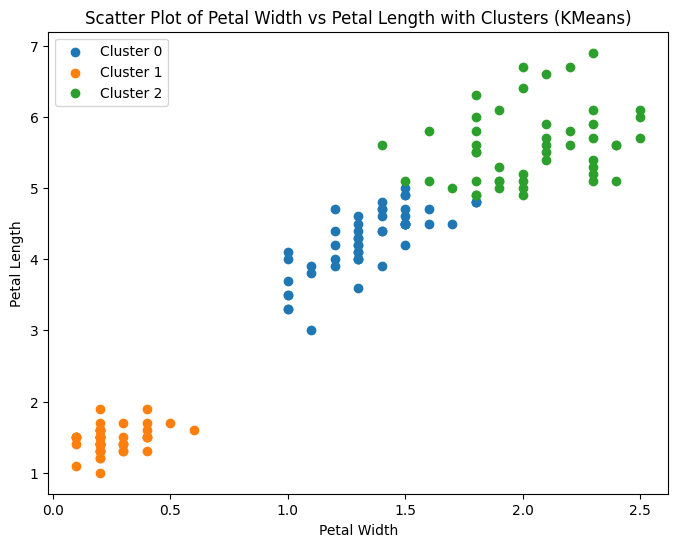

Confusion Matrix:
[[ 0 50  0]
 [48  0  2]
 [ 4  0 46]]

Confusion Matrix (with mapped labels):


array([[ 0,  0, 50],
       [ 2, 48,  0],
       [46,  4,  0]])

In [78]:

# Add a new column to the dataset with the cluster information
dataset['Cluster'] = cluster_labels


# Scatter plot of the data assigning each point to the cluster it belongs to
plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
  cluster_data = dataset[dataset['Cluster'] == cluster_id]
  plt.scatter(cluster_data['Petal_Width'], cluster_data['Petal_Length'], label=f'Cluster {cluster_id}')

plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Petal Width vs Petal Length with Clusters (KMeans)')
plt.legend()
plt.show()

# Manual pairing the labels of the real and estimated clusters

# Assuming 'cluster_labels' from KMeans and 'Flower' (true labels) are in your dataset

# Calculate the confusion matrix
cm = confusion_matrix(dataset['Flower'], dataset['Cluster'])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Manual pairing of labels
# Based on the confusion matrix, you can manually determine the best mapping between estimated clusters and true labels.
# For example, if you see that cluster 0 mostly contains data from true label 1, you can map estimated cluster 0 to true label 1.

# Example mapping (adjust based on your confusion matrix)
label_mapping = {
    0: 1,  # Estimated cluster 0 corresponds to true label 1
    1: 2,  # Estimated cluster 1 corresponds to true label 2
    2: 0   # Estimated cluster 2 corresponds to true label 0
}

# Apply the mapping to the estimated cluster labels
dataset['Mapped_Cluster'] = dataset['Cluster'].map(label_mapping)

# Calculate the confusion matrix again with the mapped labels
cm_mapped = confusion_matrix(dataset['Flower'], dataset['Mapped_Cluster'])

# Print the confusion matrix with mapped labels
print("\nConfusion Matrix (with mapped labels):")
cm_mapped

# ... (Rest of your code) ...


Centroids of the clusters:
[[1.34230769 4.26923077]
 [0.244      1.464     ]
 [2.0375     5.59583333]]


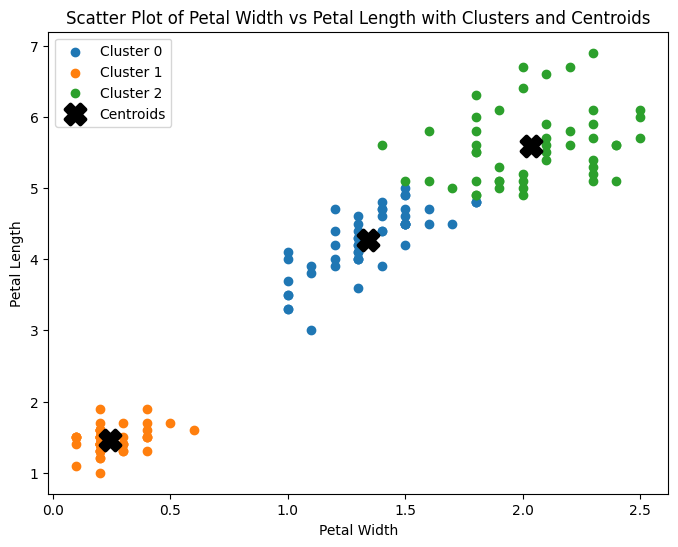

In [79]:

centroids = kmeans.cluster_centers_

# Print the centroids
print("Centroids of the clusters:")
print(centroids)

# Plot the centroids on the scatter plot
plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
  cluster_data = dataset[dataset['Cluster'] == cluster_id]
  plt.scatter(cluster_data['Petal_Width'], cluster_data['Petal_Length'], label=f'Cluster {cluster_id}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='black', label='Centroids')

plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Petal Width vs Petal Length with Clusters and Centroids')
plt.legend()
plt.show()


In [80]:
 # Sum of squared error (sse) of the final model

# Calculate SSE (Sum of Squared Errors) for the final model
sse = kmeans.inertia_
print("Sum of Squared Errors (SSE):", sse)


Sum of Squared Errors (SSE): 31.38775897435898


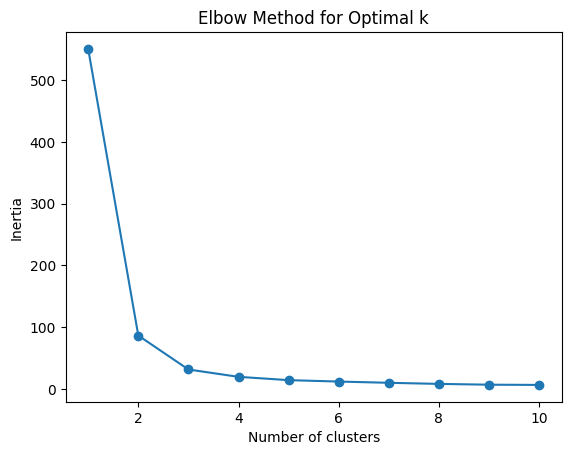

In [81]:

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# The optimal number of clusters is where the elbow occurs in the graph
# In this case, it looks like 3 is a good choice for the number of clusters
# Based on this graph, the optimal number of clusters is 3 because the curve starts to flatten out after that point
# It is a good representation of the data because the number of iterations required to converge is minimal



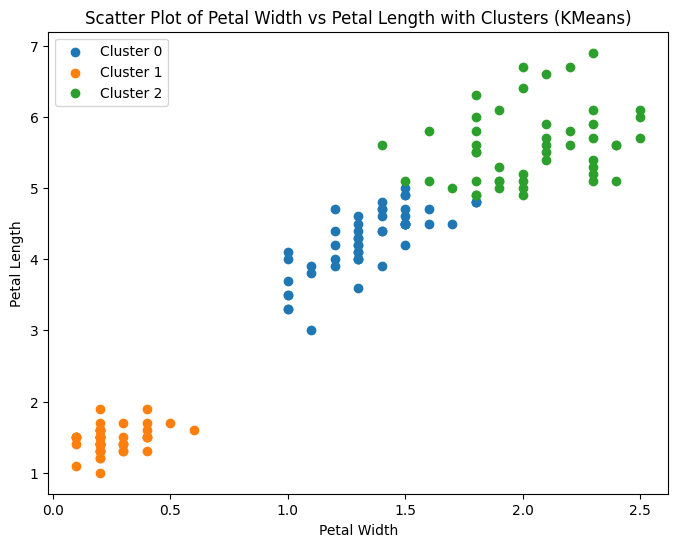

In [82]:

# Assuming you have already performed KMeans clustering and have 'dataset' with 'Cluster' column

# Scatter plot of the data assigning each point to the cluster it belongs to
plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
  cluster_data = dataset[dataset['Cluster'] == cluster_id]
  plt.scatter(cluster_data['Petal_Width'], cluster_data['Petal_Length'], label=f'Cluster {cluster_id}')

plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Petal Width vs Petal Length with Clusters (KMeans)')
plt.legend()
plt.show()


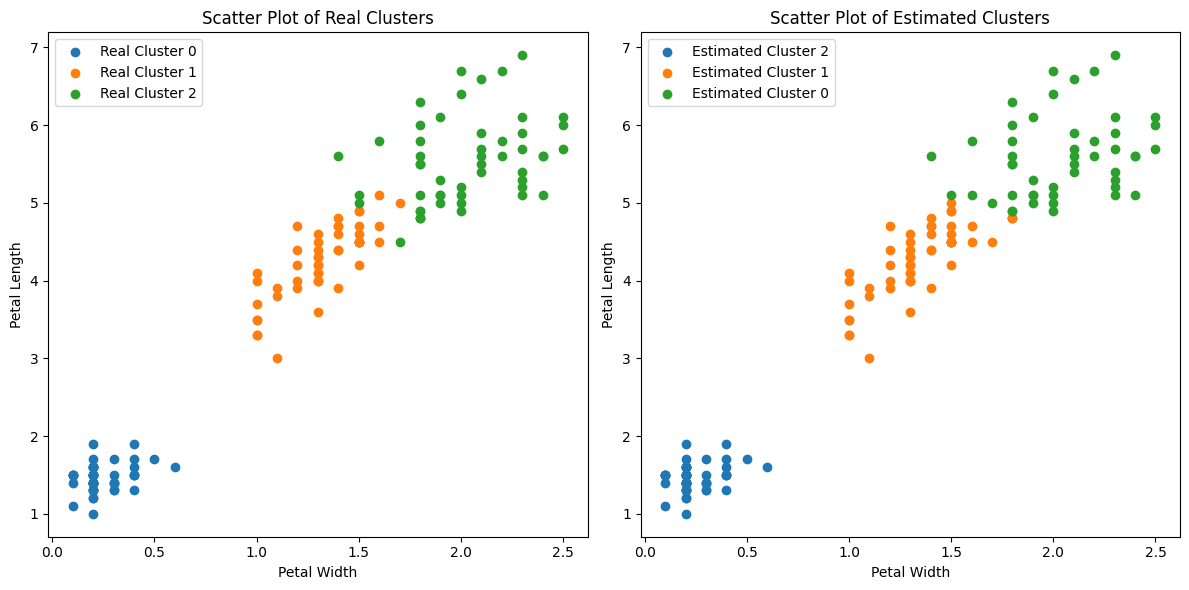

In [83]:

# Plot both real and estimated clusters to check for errors

plt.figure(figsize=(12, 6))

# Plot real clusters (using 'Flower' column)
plt.subplot(1, 2, 1)
for cluster_id in dataset['Flower'].unique():
  cluster_data = dataset[dataset['Flower'] == cluster_id]
  plt.scatter(cluster_data['Petal_Width'], cluster_data['Petal_Length'], label=f'Real Cluster {cluster_id}')

plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Real Clusters')
plt.legend()


# Plot estimated clusters (using 'Mapped_Cluster' column)
plt.subplot(1, 2, 2)
for cluster_id in dataset['Mapped_Cluster'].unique():
  cluster_data = dataset[dataset['Mapped_Cluster'] == cluster_id]
  plt.scatter(cluster_data['Petal_Width'], cluster_data['Petal_Length'], label=f'Estimated Cluster {cluster_id}')

plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Estimated Clusters')
plt.legend()

plt.tight_layout()
plt.show()



In [84]:
# Intialize a list to hold sum of squared error (sse)
# # Define values of k
# # For each k

sse = []
k_values = range(1, 11)  # You can adjust the range as needed

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)



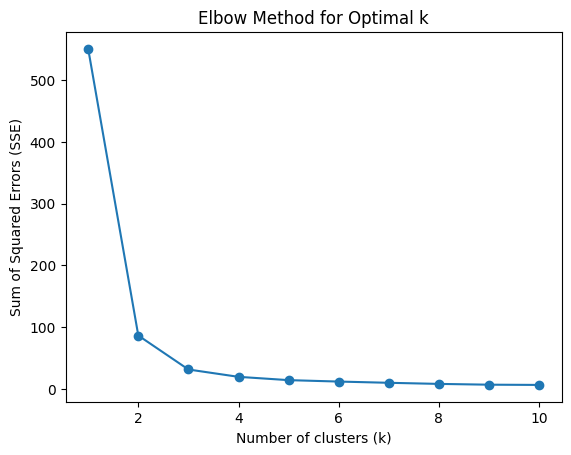

In [85]:

# Plot SSE versus k
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()
